## This one is old for refernece, look at Final Model Testing

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import math

def sin(x):
    return np.sin(np.deg2rad(x))

def cos(x):
    return np.cos(np.deg2rad(x))

def tan(x):
    return np.tan(np.deg2rad(x))

def atan(x):
    return np.arctan(np.deg2rad(x))

In [31]:
dt = 0.001
B = 6.5*10**-3   # temperature lapse rate in troposphere in K/m
R = 287   # ideal gas constant in J/(kg.K)
g = 9.80665  # gravity at sea level in m/s2
T0 = 288.15   # standard air temperature in K
P0 = 101.325   # standard air pressure in kPa
pi = math.pi
ft = 3.2884  # ft/m

In [32]:
# Manually Determined
# ... these need to be algorithmically determined eventually
imu_end_time = 19   # visually determined
a0 = 1   # visually determined
w0 = -8.2  # visually determined

In [33]:
# RAW PARAMETERS
dt = 0.001 
a_1 = -2.5 # first acceleration point after dorgue (visually determined)
t_1 = 18.6 # time corresponding to a_1
a_2 = -1   # first acceleration point after dorgue (visually determined)
t_2 = 20.6 # time corresponding to a_2

In [59]:
################## DATA FRAME ##################
#datafile = '../Fullscale21.csv'
datafile = '../Data/Trunc_Fullscale1.csv'
fields = ['Timestamp', 'Pres',
  'Roll', 'Pitch', 'Yaw',
  'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z',
  ]

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata = all_time
tdata = tdata - all_time[0]
L = tdata.shape[0]

ax_vn21 = df['LinearAccelNed X']* ft
ay_vn21 = df['LinearAccelNed Y']* ft
az_vn21 = df['LinearAccelNed Z']* -ft

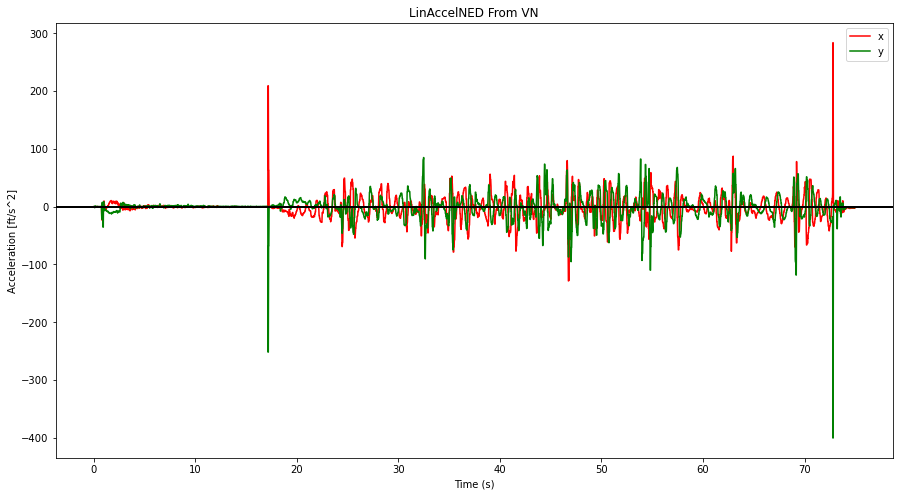

In [79]:
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ax_vn21, color='red', label='x')
l3 = ax.plot(tdata, ay_vn21, color='green', label='y')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [ft/s^2]")

ax.legend()
plt.show()

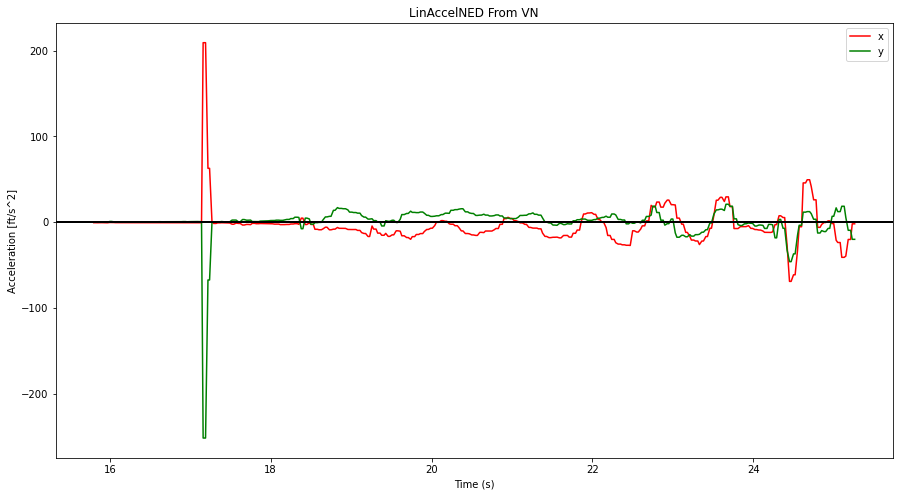

In [80]:
start21 = 625
end21 = 1000
tdata21 = tdata[start21:end21]

fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21, ax_vn21[start21:end21], color='red', label='x')
l3 = ax.plot(tdata21, ay_vn21[start21:end21], color='green', label='y')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [ft/s^2]")

ax.legend()
plt.show()

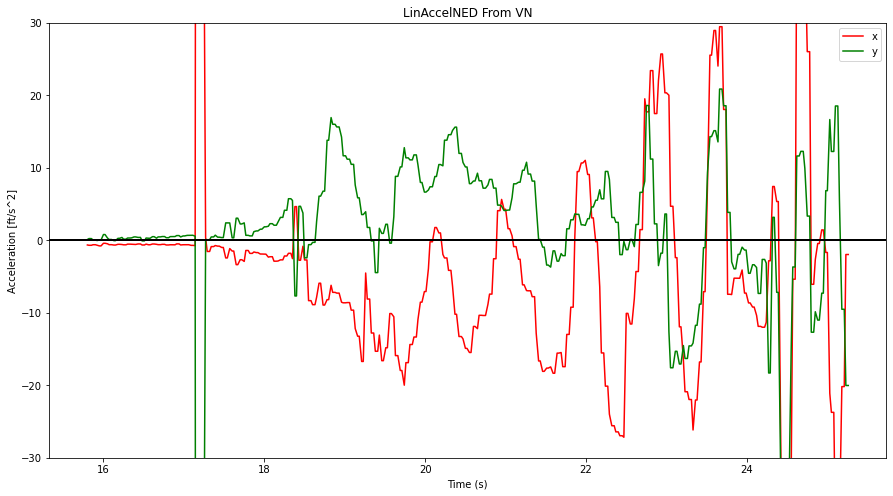

In [82]:
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata21, ax_vn21[start21:end21], color='red', label='x')
l3 = ax.plot(tdata21, ay_vn21[start21:end21], color='green', label='y')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [ft/s^2]")
ax.set_ylim(-30, 30)

ax.legend()
plt.show()

In [113]:
start21

625

In [114]:
end21

1000

In [125]:
start21_ = 675
end21_ = 700

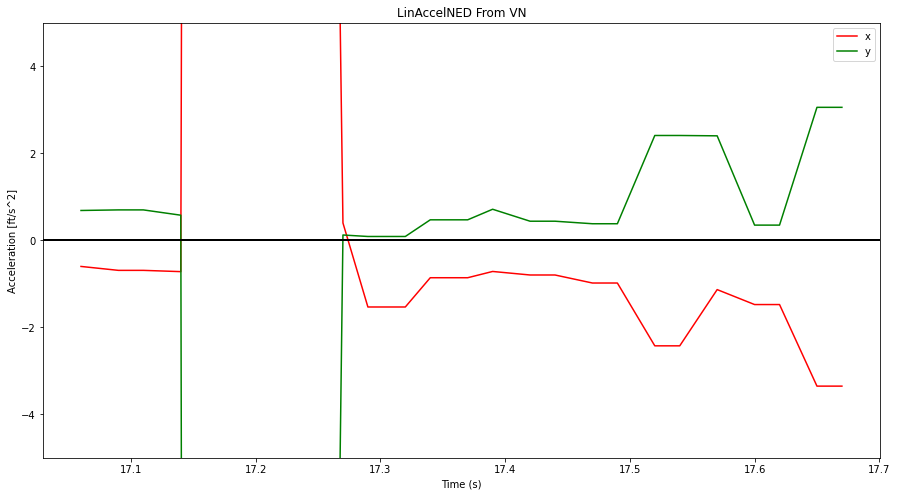

In [128]:
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata[start21_:end21_], ax_vn21[start21_:end21_], color='red', label='x')
l3 = ax.plot(tdata[start21_:end21_], ay_vn21[start21_:end21_], color='green', label='y')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("LinAccelNED From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [ft/s^2]")
ax.set_ylim(-5, 5)

ax.legend()
plt.show()

In [83]:
def find_peak_and_wait(ax, t, thresh=50, takeoff_delay=1, signal_length=5):
    axn = np.array(ax)
    above_threshold = axn > thresh
    first_pass = list(above_threshold).index(True)

    i = first_pass
    while t[i] < (t[first_pass] + takeoff_delay):
        i += 1
        
    j = i
    while t[j] < (t[i] + signal_length):
        j += 1
        
    return i, j, first_pass

In [86]:
imu_start_time, imu_end_time, takeoff_time = find_peak_and_wait(np.array(ax_vn21), tdata)
print(f"Drogue Detected: {tdata[takeoff_time]} seconds at index {takeoff_time}")
print(f"After Delay: {tdata[imu_start_time]} seconds at index {imu_start_time}")
print(f"End of Signal: {tdata[imu_end_time]} seconds at index {imu_end_time}")

Drogue Detected: 17.159999999999854 seconds at index 679
After Delay: 18.170000000000073 seconds at index 719
End of Signal: 23.18000000000029 seconds at index 917


In [63]:
imu_t = df['Timestamp'].values
imu_t = imu_t - imu_t[0]
imu_N = len(imu_t)
imu_ax = df['LinearAccelNed X'].values
imu_ay = df['LinearAccelNed Y'].values
imu_az = df['LinearAccelNed Z'].values * -1
imu_pres = df['Pres']

################## INIT VECTORS  ##################
imu_vx, imu_vy, imu_vz, imu_x, imu_y, imu_z = (np.zeros((imu_N)), np.zeros((imu_N)), 
                                               np.zeros((imu_N)), np.zeros((imu_N)), 
                                               np.zeros((imu_N)), np.zeros((imu_N)))

################## Find velocity and position  ##################
for i in range(imu_N-1):
    imu_vz[i+1] = imu_vz[i] + imu_az[i]*(imu_t[i+1] - imu_t[i])
    imu_z[i+1] = imu_z[i] + imu_vz[i]*(imu_t[i+1] - imu_t[i])
    
    imu_vx[i+1] = imu_vx[i] + imu_ax[i]*(imu_t[i+1] - imu_t[i])
    imu_x[i+1] = imu_x[i] + imu_vx[i]*(imu_t[i+1] - imu_t[i])
    
    imu_vy[i+1] = imu_vy[i] + imu_ay[i]*(imu_t[i+1] - imu_t[i])
    imu_y[i+1] = imu_y[i] + imu_vy[i]*(imu_t[i+1] - imu_t[i])
    
################## Find alt  ##################
def nasa_pres(P, P0, T0, R, B, g):
    imu_temp = T0*(P/P0)**(R*B/g)
    imu_alt = (T0 - imu_temp)/B
    return imu_alt

vec_NASA_pres = np.vectorize(nasa_pres)
imu_alt = vec_NASA_pres(imu_pres, P0, T0, R, B, g)   # * ft + 600
imu_alt = imu_alt - imu_alt[imu_N-1]

imu_alt = [val if val > 0 else 0 for val in imu_alt]

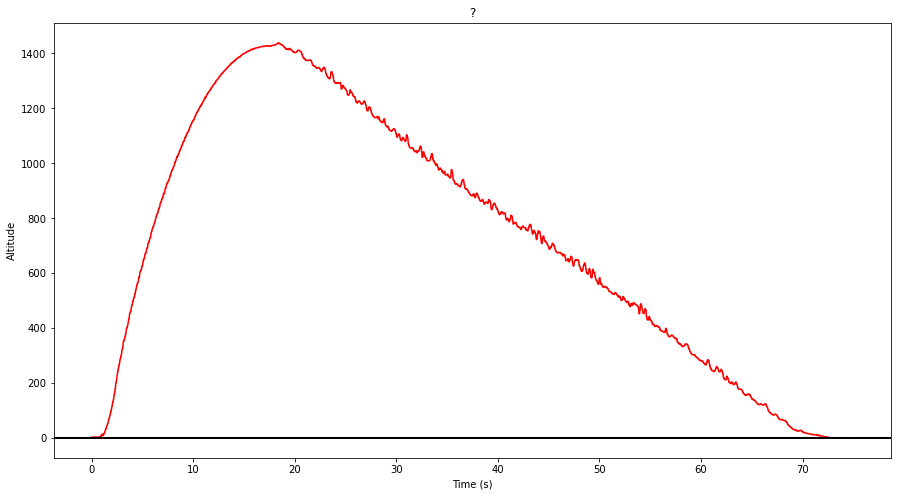

In [64]:
fig1 = plt.figure(1, figsize=(15,8))
ax = plt.subplot(111)
l2 = ax.plot(imu_t, imu_alt, color='red')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("?")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude")
plt.show()

## Wind Density Profile

In [65]:
## DERIVED PARAMETERS
delta_t = t_2 - t_1 
w_0 = a_1*delta_t/(sqrt(a_1/a_2)-1); # wind speed at apogee in m/s
K = a_1/w_0**2 
w_0_mph = w_0/0.44704
z_0 = max(imu_alt) # apogee altitude in m

################## CONSTANT WIND PROFILE & AIR DENSITY  ##################
wind_profile_x = np.zeros((imu_N))
density_profile = np.zeros((imu_N))

z0 = max(imu_alt) # apogee altitude in m

w0_mph = w0/0.44704

for i in range(imu_N):
    T = T0 - B * imu_alt[i]
    P = P0 * 1000 * (T/T0)**(g/(R*B))
    density_profile[i] = P/(R*T)
    if imu_alt[i] < 2:
        wind_profile_x[i] = w0*((2/z0)**(1/7))
    else:
        wind_profile_x[i] = w0*((imu_alt[i]/z0)**(1/7))

## Model1

In [66]:
def model1(t_1, imu_t, imu_vx, imu_x):
    ## RAW PARAMETERS
    imu_end_time = t_1 # uncertainty start time in s (visually determined)

    ## MODEL  #1: SIMULATE TRAJECTORY AFTER DROGUE
    # Initial parameters
    min111 = np.amin(abs(imu_t - imu_end_time))
    imu_end_ii = np.where(abs(imu_t - imu_end_time) == min111)[0][0]
    sim_start_t = imu_end_time
    sim_end_t = imu_t[-1]

    # Construct arrays
    sim_t = list(np.arange(sim_start_t, sim_end_t, dt))
    sim_N = len(sim_t)

    sim_ax = np.zeros(sim_N)
    sim_vx = np.zeros(sim_N)
    sim_x = np.zeros(sim_N)

    # Initialize acceleration, velocity, and displacement
    sim_ax[0] = imu_vx[imu_end_ii]

    sim_ax[0] = a_1

    sim_x[0] = imu_x[imu_end_ii]
    dV = sim_ax[0] * dt

    sim_curr_alt = np.zeros((sim_N))
    sim_curr_alt[0] = imu_alt[imu_end_ii]


    for i in range(sim_N-1):
        sim_curr_time = sim_t[i+1]    
        min222 = min(abs(imu_t - sim_curr_time))
        imu_index = np.where(abs(imu_t - sim_curr_time) == min222)[0][0]

        sim_curr_alt[i+1] = imu_alt[imu_index]

        sim_x[i+1] = sim_x[i] + sim_vx[i]*dt + 0.5*dV*dt
        sim_vx[i+1] = sim_vx[i] + dV

        sign_bool = (wind_profile_x[imu_index] < 0 and sim_vx[i+1] < 0) or \
                    (wind_profile_x[imu_index] > 0 and sim_vx[i+1] > 0) or \
                    (wind_profile_x[imu_index] == 0 and sim_vx[i+1] == 0)
        if (abs(wind_profile_x[imu_index]) < abs(sim_vx[i+1])) and sign_bool:
            sim_ax[i+1] = -K * ((wind_profile_x[imu_index] - sim_vx[i+1])**2)
        else:
            sim_ax[i+1] = K * ((wind_profile_x[imu_index] - sim_vx[i+1])**2)

        dV = sim_ax[i+1]*dt

    # Combine IMU ascent with the simulation
    t1 = np.hstack((imu_t[0:imu_end_ii], sim_t))
    ax1 = np.hstack((imu_ax[0:imu_end_ii], sim_ax))
    vx1 = np.hstack((imu_vx[0:imu_end_ii], sim_vx))
    x1 = np.hstack((imu_x[0:imu_end_ii], sim_x))

    return x1, t1

In [67]:
def model2(imu_t, dt):
    # MODEL  #2: SIMULATE TRAJECTORY AFTER TAKE OFF
    max_sim_time = imu_t[-1] # maximum simulation time in s
    # t = list(range(0, max_sim_time, dt))  # time array
    t = np.arange(0, max_sim_time, dt)
    N = len(t)  # time array size
    x, z = np.zeros(N), np.zeros(N)  # z and x displacement array
    vx, vz = np.zeros(N), np.zeros(N)  # z and x velocity array
    ax, az = np.zeros(N), np.zeros(N)  # z and x acceleration array
    v = np.zeros(N)
    m = np.zeros(N)  # mass array
    theta = np.zeros(N)  # angle array
    omega = np.zeros(N)  # angle array
    alpha = np.zeros(N)  # angle array
    theta0 = 2*pi/180  # launch angle array in radians

    # RAW PARAMETERS
    m_dry = 16.57  # rocket dry mass in kg
    Cd = 0.39  # rocket drag coefficient
    Cd_side = 1  # rocket side drag coefficient
    L = 2.06  # rocket length in m
    D = 0.1524  # rocket diameter in m
    SSM = 2.6  # static stability margin
    T_avg = 1740  # average motor thrust in N
    t_burn = 2.1  # motor burn time in s
    m_motor = 1.76  # motor wet mass in kg
    L_rail = 2  # launch rail transit in m
    number_of_time_steps = 2

    # DERIVED PARAMETERS
    A_rocket = pi*(D**2)/4  # rocket cross sectional area in m2
    A_side_r = 0.374  # rocket side area in m2
    m_wet = m_dry + m_motor  # rocket wet mass in kg
    m_dot = m_motor/t_burn  # motor burn rate in kg/s

    # SIMULATION PARAMETERS
    i = 0  # loop index
    m[i] = m_wet  # initial wet mass in kg
    ax[i] = T_avg / m[i] * sin(theta0)
    az[i] = T_avg / m[i] * cos(theta0) - g
    theta[i] = theta0  # initial angle (launch) in radians
    i = i + 1  # increase loop

    # STAGE 1: POWERED ASCENT ON LAUNCH RAIL
    # while z altitude is lower than the launch rail altitude
    while (np.linalg.norm([x[i-1], z[i-1]]) < L_rail):
        theta[i] = theta0  # constant angle until launch rail is cleared

        x[i] = x[i-1] + vx[i-1]*dt  # calculate x position
        z[i] = z[i-1] + vz[i-1]*dt  # calculate z position

        vz[i] = vz[i-1] + az[i-1]*dt  # calculate z velocity
        vx[i] = vx[i-1] + ax[i-1]*dt  # calculate x velocity
        v[i] = np.linalg.norm([vx[i], vz[i]])  # calculate velocity along axis

        m[i] = m[i-1] - m_dot*dt  # calculate mass

        ax[i] = T_avg/m[i]*sin(theta0)
        az[i] = T_avg/m[i]*cos(theta0) - g

        i = i + 1  # increase simulation step

    t_LRE = t[i-1]  # launch rail exit time
    i_LRE = i-1

    # STAGE 2: WIND COCKING DURING POWERED ASCENT
    minDistance = np.amin(abs(imu_alt - z[i_LRE]))
    imu_LRE = np.where(abs(imu_alt - z[i_LRE]) == minDistance)[0][0]
    w_LRE = abs(wind_profile_x[imu_LRE])
    tau = (w_LRE/(T_avg/m[i_LRE]-g))*(SSM**2/(SSM-1))

    # whole wind cocking occurs
    while (t[i-1] < t[i_LRE] + number_of_time_steps*tau):
        theta[i] = theta[i-1] + omega[i-1]*dt  # calculate angle
        omega[i] = omega[i-1] + alpha[i-1]*dt  # calculate angular velocity

        x[i] = x[i-1] + vx[i-1]*dt  # calculate x position
        z[i] = z[i-1] + vz[i-1]*dt  # calculate z position

        vz[i] = vz[i-1] + az[i-1]*dt  # calculate z velocity
        vx[i] = vx[i-1] + ax[i-1]*dt  # calculate x velocity
        v[i] = np.linalg.norm([vx[i], vz[i]])  # calculate velocity along axis

        minDistance = np.amin(abs(imu_alt - z[i]))
        imu_index = np.where(abs(imu_alt - z[i]) == minDistance)[0][0]
        w = abs(wind_profile_x[imu_index])  # side wind calculation
        rho = density_profile[imu_index]

        m[i] = m[i-1] - m_dot*dt  # calculate mass

        I = 1/12*m[i]*(L**2)  # calculate inertia

        FD_side = 0.5*Cd_side*A_side_r*rho*((vx[i]+w)**2)  # calculate side drag
        FD = 0.5*Cd*rho*(v[i]**2)*A_rocket  # calculate drag along axis

        alpha[i] = FD_side*D*cos(theta[i])*SSM/I  # calculate angular accel.

        # calculate acceleration along rocket axis
        dv = (((T_avg-FD-FD_side*sin(theta[i]))/m[i])-g*cos(theta[i]))*dt
        v[i] = v[i-1] + dv

        vx[i] = v[i] * sin(theta[i])
        vz[i] = v[i] * cos(theta[i])

        # accelerations
        ax[i] = (dv/dt) * sin(theta[i])
        az[i] = (dv/dt) * cos(theta[i])

        i = i + 1  # increase simulation step

    # STAGE 3: POWERED ASCENT
    # while MECO is reached
    while (t[i-1] < t_burn):
        x[i] = x[i-1] + vx[i-1]*dt  # calculate x position
        z[i] = z[i-1] + vz[i-1]*dt  # calculate z position

        minDistance = np.amin(abs(imu_alt - z[i]))
        imu_index = np.where(abs(imu_alt - z[i]) == minDistance)[0][0]
        rho = density_profile[imu_index]

        vz[i] = vz[i-1] + az[i-1]*dt  # calculate z velocity
        vx[i] = vx[i-1] + ax[i-1]*dt  # calculate x velocity
        v = sqrt((vz[i])**2 + (vx[i])**2)  # calculate velocity along axis

        theta[i] = atan(vx[i]/vz[i])  # calculate angle

        FD = 0.5*Cd*rho*(v**2)*A_rocket  # calculate drag along axis

        m[i] = m[i-1] - m_dot*dt  # calculate mass

        ax[i] = (T_avg-FD)*sin(theta[i])/m[i]  # calculate x accel.
        az[i] = (T_avg-FD)*cos(theta[i])/m[i]-g  # calculate y accel.

        i = i + 1  # increase simulation step

    # STAGE 4: COAST ASCENT
    while (vz[i-1] > 0):
        x[i] = x[i-1] + vx[i-1]*dt  # calculate x position
        z[i] = z[i-1] + vz[i-1]*dt  # calculate z position

        minDistance = np.amin(abs(imu_alt - z[i]))
        imu_index_1 = np.where(abs(imu_alt - z[i]) == minDistance)[0][0]
        rho = density_profile[imu_index_1]

        vz[i] = vz[i-1] + az[i-1]*dt  # calculate z velocity
        vx[i] = vx[i-1] + ax[i-1]*dt  # calculate x velocity
        v = sqrt((vz[i])**2 + (vx[i])**2)  # calculate velocity along axis

        theta[i] = atan(vx[i]/vz[i])  # calculate angle

        FD = 0.5*Cd*rho*(v**2)*A_rocket# calculate drag along axis

        ax[i] = -FD*sin(theta[i])/m_dry  # calculate x accel.
        az[i] = -FD*cos(theta[i])/m_dry-g  # calculate y accel.

        i = i + 1  # increase simulation step

    i_sim_end = i - 1

    # Initialize acceleration, velocity, and displacement
    dV = ax[i_sim_end] * dt

    # Find acceleration, velocity, and displacement
    for i in range(i_sim_end, len(t)-1):
        min444 = np.amin(abs(imu_t - t[i+1]))
        imu_index1 = np.where(abs(imu_t - t[i+1]) == min444)[0][0]

        x[i+1] = x[i] + vx[i]*dt + 0.5*dV*dt
        vx[i+1] = vx[i] + dV

        sign_bool = (wind_profile_x[imu_index1] < 0 and vx[i+1] < 0) or \
                    (wind_profile_x[imu_index1] > 0 and vx[i+1] > 0) or \
                    (wind_profile_x[imu_index1] == 0 and vx[i+1] == 0)
        if (abs(wind_profile_x[imu_index1]) < abs(vx[i+1])) and sign_bool:
            ax[i+1] = -K * ((wind_profile_x[imu_index1] - vx[i+1])**2)
        else:
            ax[i+1] = K * ((wind_profile_x[imu_index1] - vx[i+1])**2)

        dV = ax[i+1]*dt

    t_end = i - 1

    # Trim Arrays
    t, x = t[0:t_end], x[0:t_end]
    z, ax = z[0:t_end], ax[0:t_end]
    az, vx = az[0:t_end], vx[0:t_end]
    vz, theta = vz[0:t_end], theta[0:t_end]
    
    return x, t

In [68]:
x1, t1 = model1(t_1, imu_t, imu_vx, imu_x)

In [69]:
x2, t2 = model2(imu_t, dt)

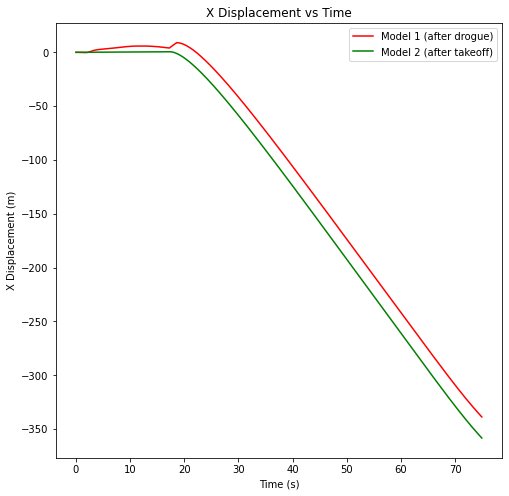

In [70]:
fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
ax.plot(t1, x1, color='red', label='Model 1 (after drogue)')
ax.plot(t2, x2, color='green', label='Model 2 (after takeoff)')
ax.set_title("X Displacement vs Time")  # 'interpreter','latex', 'FontSize', 16
ax.set_xlabel("Time (s)")  # 'interpreter','latex', 'FontSize', 16
ax.set_ylabel("X Displacement (m)")  # 'interpreter','latex', 'FontSize', 16
ax.legend()
plt.show()

In [ ]:
# RAW PARAMETERS
dt = 0.001 
a_1 = -2.5 # first acceleration point after dorgue (visually determined)
t_1 = 18.6 # time corresponding to a_1
a_2 = -1   # first acceleration point after dorgue (visually determined)
t_2 = 20.6 # time corresponding to a_2

In [ ]:
# Manually Determined
# ... these need to be algorithmically determined eventually
imu_end_time = 19   # visually determined
a0 = 1   # visually determined
w0 = -8.2  # visually determined

In [ ]:
dt = 0.001
B = 6.5*10**-3   # temperature lapse rate in troposphere in K/m
R = 287   # ideal gas constant in J/(kg.K)
g = 9.80665  # gravity at sea level in m/s2
T0 = 288.15   # standard air temperature in K
P0 = 101.325   # standard air pressure in kPa
pi = math.pi
ft = 3.2884  # ft/m

In [ ]:
imu_t = df['Timestamp'].values
imu_t = imu_t - imu_t[0]
imu_N = len(imu_t)
imu_ax = df['LinearAccelNed X'].values
imu_ay = df['LinearAccelNed Y'].values
imu_az = df['LinearAccelNed Z'].values * -1
imu_pres = df['Pres']

################## INIT VECTORS  ##################
imu_vx, imu_vy, imu_vz, imu_x, imu_y, imu_z = (np.zeros((imu_N)), np.zeros((imu_N)), 
                                               np.zeros((imu_N)), np.zeros((imu_N)), 
                                               np.zeros((imu_N)), np.zeros((imu_N)))

################## Find velocity and position  ##################
for i in range(imu_N-1):
    imu_vz[i+1] = imu_vz[i] + imu_az[i]*(imu_t[i+1] - imu_t[i])
    imu_z[i+1] = imu_z[i] + imu_vz[i]*(imu_t[i+1] - imu_t[i])
    
    imu_vx[i+1] = imu_vx[i] + imu_ax[i]*(imu_t[i+1] - imu_t[i])
    imu_x[i+1] = imu_x[i] + imu_vx[i]*(imu_t[i+1] - imu_t[i])
    
    imu_vy[i+1] = imu_vy[i] + imu_ay[i]*(imu_t[i+1] - imu_t[i])
    imu_y[i+1] = imu_y[i] + imu_vy[i]*(imu_t[i+1] - imu_t[i])
    
################## Find alt  ##################
def nasa_pres(P, P0, T0, R, B, g):
    imu_temp = T0*(P/P0)**(R*B/g)
    imu_alt = (T0 - imu_temp)/B
    return imu_alt

vec_NASA_pres = np.vectorize(nasa_pres)
imu_alt = vec_NASA_pres(imu_pres, P0, T0, R, B, g)   # * ft + 600
imu_alt = imu_alt - imu_alt[imu_N-1]
imu_alt = [val if val > 0 else 0 for val in imu_alt]

In [99]:
imu_start_time, imu_end_time, takeoff_time = find_peak_and_wait(np.array(imu_ax), imu_t)

In [100]:
def calc_moving_avg(axg21t, n, tdata21, dynamic_window=False, dynamic_n_timing=140, dynamic_n=80):        
    if dynamic_window:
        axg21s_1 = pd.Series(axg21t[0:dynamic_n_timing]).rolling(window=n).mean().iloc[n-1:].values
        axg21s_2 = pd.Series(axg21t).rolling(window=dynamic_n).mean().iloc[n-1:].values[dynamic_n_timing:]
        new_axg21s = list(axg21s_1) + list(axg21s_2)
    else:
        axg21s = pd.Series(axg21t).rolling(window=n).mean().iloc[n-1:].values
        new_axg21s = list(axg21s)
    while len(new_axg21s) < len(tdata21):
        new_axg21s = [0] + list(new_axg21s) + [0]
    return new_axg21s

In [102]:
trunc_signal = imu_ax[imu_start_time:imu_end_time]
trunc_time = imu_t[imu_start_time:imu_end_time]

sus_area = 0.5*0.5*max(trunc_signal)*(trunc_time[-1] - trunc_time[0])
sus_area

9.755961474999573

In [103]:
trunc_time[-1] - trunc_time[0]

4.989999999999782

In [104]:
max(trunc_signal)

7.82041

In [112]:
smoothed_signal = calc_moving_avg(trunc_signal, 25, trunc_time, dynamic_window=False, dynamic_n_timing=140, dynamic_n=80)

sus_area = 0.5*max(smoothed_signal)*(trunc_time[-1] - trunc_time[0])
sus_area

6.946109141599697

In [110]:
from scipy import integrate

In [111]:
result_trapz_IMU = scipy.integrate.trapz(trunc_signal, dx=0.2E-6)
result_trapz_MA = scipy.integrate.trapz(smoothed_signal, dx=0.2E-6)

print(f"Estimated Wind Speed via Original IMU Signal: {result_trapz_IMU:.8f} m/s")
print(f"Estimated Wind Speed via Moving Average: {result_trapz_MA:.8f} m/s")

Estimated Wind Speed via Original IMU Signal: -0.00007614 m/s
Estimated Wind Speed via Moving Average: -0.00008286 m/s


In [ ]:
delta_t = t_2 - t_1 
w_0 = a_1*delta_t/(sqrt(a_1/a_2)-1); # wind speed at apogee in m/s
#K = a_1/w_0**2 

In [ ]:
## DERIVED PARAMETERS
w_0_mph = w_0/0.44704
z_0 = max(imu_alt) # apogee altitude in m

################## CONSTANT WIND PROFILE & AIR DENSITY  ##################
wind_profile_x = np.zeros((imu_N))
density_profile = np.zeros((imu_N))

z0 = max(imu_alt) # apogee altitude in m

for i in range(imu_N):
    T = T0 - B * imu_alt[i]
    P = P0 * 1000 * (T/T0)**(g/(R*B))
    density_profile[i] = P/(R*T)
    if imu_alt[i] < 2:
        wind_profile_x[i] = w0*((2/z0)**(1/7))
    else:
        wind_profile_x[i] = w0*((imu_alt[i]/z0)**(1/7))

In [ ]:
x1, t1 = model1(t_1, imu_t, imu_vx, imu_x)
x2, t2 = model2(imu_t, dt)

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
ax.plot(t1, x1, color='red', label='Model 1 (after drogue)')
ax.plot(t2, x2, color='green', label='Model 2 (after takeoff)')
ax.set_title("X Displacement vs Time")  # 'interpreter','latex', 'FontSize', 16
ax.set_xlabel("Time (s)")  # 'interpreter','latex', 'FontSize', 16
ax.set_ylabel("X Displacement (m)")  # 'interpreter','latex', 'FontSize', 16
ax.legend()
plt.show()